In [1]:
import os, sys
import torch
from pathlib import Path
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


__file__ = os.path.dirname(os.path.realpath("__file__"))
root_dir = (Path(__file__).parent / "..").resolve()
lib_dir = (root_dir / "lib").resolve()
print("The root path: {:}".format(root_dir))
print("The library path: {:}".format(lib_dir))
assert lib_dir.exists(), "{:} does not exist".format(lib_dir)
if str(lib_dir) not in sys.path:
    sys.path.insert(0, str(lib_dir))

from datasets.synthetic_example import create_example_v1

The root path: /Users/xuanyidong/Desktop/AutoDL-Projects
The library path: /Users/xuanyidong/Desktop/AutoDL-Projects/lib


/Users/xuanyidong/Desktop/AutoDL-Projects/lib/datasets/synthetic_env.py:63: RuntimeWarning: covariance is not positive-semidefinite.
  dataset = np.random.multivariate_normal(


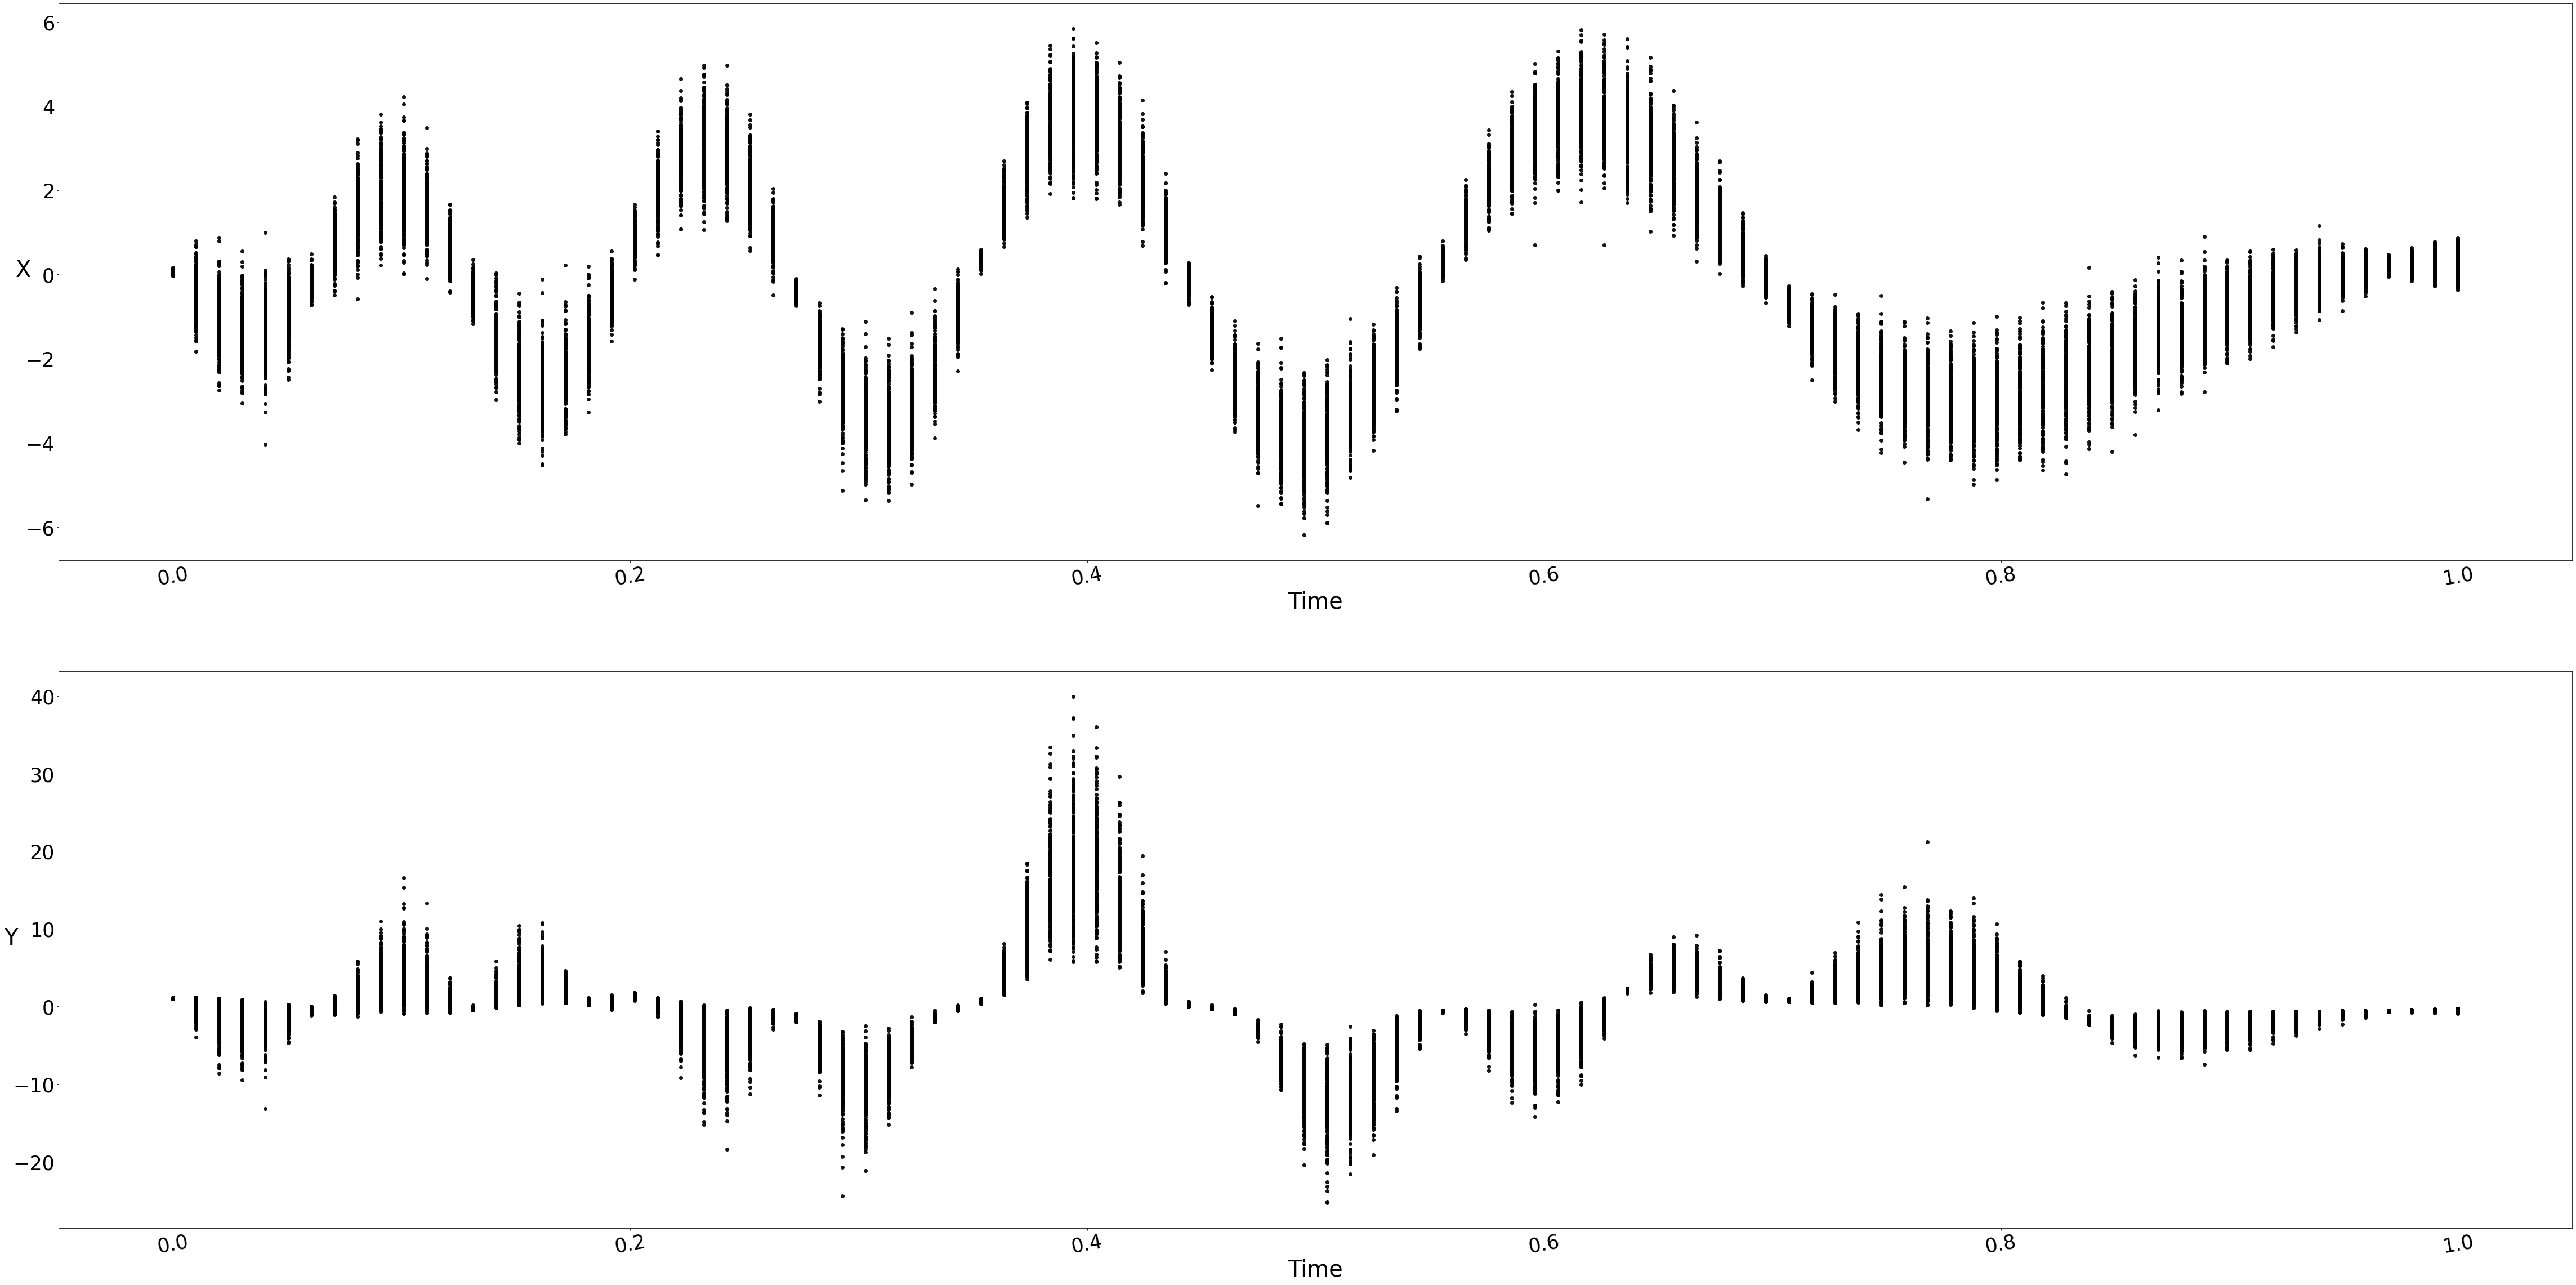

In [2]:
def visualize_env():
    
    dpi, width, height = 10, 800, 400
    figsize = width / float(dpi), height / float(dpi)
    LabelSize, LegendFontsize, font_gap = 40, 40, 5

    fig = plt.figure(figsize=figsize)

    dynamic_env, function = create_example_v1(num_per_task=250)
    
    timeaxis, xaxis, yaxis = [], [], []
    for timestamp, dataset in dynamic_env:
        num = dataset.shape[0]
        timeaxis.append(torch.zeros(num) + timestamp)
        xaxis.append(dataset[:,0])
        # compute the ground truth
        function.set_timestamp(timestamp)
        yaxis.append(function(dataset[:,0]))
        
    timeaxis = torch.cat(timeaxis).numpy()
    # import pdb; pdb.set_trace()
    xaxis = torch.cat(xaxis).numpy()
    yaxis = torch.cat(yaxis).numpy()

    cur_ax = fig.add_subplot(2, 1, 1)
    cur_ax.scatter(timeaxis, xaxis, color="k", linestyle="-", alpha=0.9, label=None)
    cur_ax.set_xlabel("Time", fontsize=LabelSize)
    cur_ax.set_ylabel("X", rotation=0, fontsize=LabelSize)
    for tick in cur_ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(LabelSize - font_gap)
        tick.label.set_rotation(10)
    for tick in cur_ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(LabelSize - font_gap)
    
    cur_ax = fig.add_subplot(2, 1, 2)
    cur_ax.scatter(timeaxis, yaxis, color="k", linestyle="-", alpha=0.9, label=None)
    cur_ax.set_xlabel("Time", fontsize=LabelSize)
    cur_ax.set_ylabel("Y", rotation=0, fontsize=LabelSize)
    for tick in cur_ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(LabelSize - font_gap)
        tick.label.set_rotation(10)
    for tick in cur_ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(LabelSize - font_gap)
    plt.show()

visualize_env()